#                                       Big Data Infrastructure Projekt

## Zusammenhang zwischen positiven Covid19-Testungen und Impfungen

In diesem Big Data Infrastructure Projekt geht es darum  die Anzahl der positiven Testungen sowie die Impfungen in Österreich bzw. in den jeweiligen Bundesländern/Gemeinden zu analysieren, zu visualisieren und miteinander in Zusammenhang zu setzen. 

In diesem Jupiter-Notebook werden alle relevanten Schritte (sowie Erklärungen dazu) dokumentiert.

## Neo4J

Neo4J ist eine NoSQL-Graph-Database. Sie wurde aus folgenden Gründen für dieses Projekt gewählt:

- Flexibilität
- ACID-Transaktionen werden unterstützt
- Daten sind eng miteinander verbunden
- Einfache Darstellung der Daten

BILD für letzten beiden punkte
BILD
BILD
BILD

## 5 V's

### Volume:

- Fallen die Daten in großen Mengen an?

Es ist wichtig anzumerken, dass die Größe der Datenmenge relativ ist. Dennoch fallen in diesem Projekt eindeutig keine großen Datenmengen an. Daher ist dieser Punkt hier wenig Big-Data-relevant.

Alle genutzten Daten haben gemeinsam eine Größe von:
- ~ 13 000 Datensätzen
- ~ 900 KB

### Velocity:

- Fallen die Daten in einer großen Geschwindigkeit an?
- In welcher Geschwindigkeit werden die Daten verarbeitet?

Da in diesem Projekt keine neuen Daten anfallen ist Velocity hier nicht relevant.

Lese-Zeit für ~ 900 KB:
- HDD: ~ 0,009 Sekunden bei 100 MB/s
- SSD: ~ 0,002 Sekunden bei 450 MB/s

Transfer-Zeit über Netzwertk für ~ 900 KB:
- ~ 0,009 Sekunden bei 100 MB/s

### Variety:

- Fallen die Daten in Großer Vielfalt an (Datentyp, Datenstruktur)?

Alle genutzten Daten dieses Projekts sind vom TYP CSV und strukturiert. Daher sind sie auch vollständig und folgen einem klaren Schema. Die Daten könnten daher auch in einer relationalen Datenbank mit Reihen und Spalten gespeichert werden.

### Veracity:

- Sind die daten von hoher Qualität (Glaubwürdigkeit, Gültigkeit, Wahrhaftigkeit)?

Alle Daten dieses Projekts stammen aus glaubwürdigen Quellen:
- https://info.gesundheitsministerium.at/
- https://www.data.gv.at/

Zusätzlich wurden die Daten auf Unstimmigkeiten (Ausreißer, Widersprüche, Fehlende Werte) geprüft. Deshalb kann davon ausgegangen werden, dass die Daten von hoher Qualität sind.

### Value:

- Haben die Daten einen Mehrwert?

Die genutzten Daten haben einen großen Mehrwert. Durch ihre Analyse wird ein möglicher Zusammenhang zwischen den positiven Covid19-Testungen und den Impfungen festgestellt.

## 4 Levels of Data Processing

### Data Sources (Data Source Layer):

Für dieses Projekt sind keine Tools zur Datengewinnung notwendig. Die Daten wurden einmalig aus Quellen des Internets lokal abgespeichert.

Daten:
- Typ: Strukturiert
- Velocity und Volume: Die Daten fallen einamlig in geringer Menge an
- Externe Datenquelle: https://info.gesundheitsministerium.at/ und https://www.data.gv.at/
- Daten-Typ: CSV

### Data Messaging and Store Layer (Data Storage Layer):

Die Daten wurden über Docker in der No-SQL-Graph-Database "Neo4J" gespeichert. Wie schnell die Daten gespeichert werden ist nicht releveant, da sie einmalig gewonnen wurden.

CAP:
- Consistency: Neo4J bietet ACID-Transaktionen
- Availability: Noe4J bietet Mechanismen für teilweisen Systemausfall
- Partition Tolerance: Nicht relevant, da die Datenbank nur auf einem System ist

### Analysis Layer (Processing Layer):

Die Daten wurden mit einigen Pandas Funktionen analysiert. Zudem wurde eine MapReduce-Calculation mit Apache Hadoop durchgeführt.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Consumption Layer (Data Output Layer):

Die Ergebnisse der Analyse und deren Value wurden mithilfe von Visualisierungen dargestellt. Hierzu wurden die Python-Libraries "Matplotlib" und "Seaborn" verwendet.

Folgende Diagrammtypen wurden eingesetzt:
- Barplots
- Histogramme
- Kreisdiagramme
- Boxplots
- Streudiagramme!!!!!!!!!!!!!!!!!!!!!!!!!!

Es wurden außerdem die Datenbank-Visualisierungen von Neo4J genutzt.

## Analyse

Zuerst wird ein Docker Container erstellt. Dieser enthällt einen Container, ein neo4j Image, auf welches durch die Ports 7474 und 7687 zugegriffen wird, sowie auch ein Volume und die Verbindung mit neo4j mit Username und Passwort.

In [36]:
!docker-compose -p completx_sql up -d

 Container neo4j-container  Created
 Container neo4j-container  Starting
 Container neo4j-container  Started


Um Neo4j zu verwenden, müssen Sie es und seinen Python-Treiber installieren. Darüber hinaus erleichtert die Installation der Bibliothek py2neo die Verbindungen und Interaktionen mit der Neo4j-Datenbank.

In [37]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install py2neo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install nbformat>=4.20

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Des weiteren werden Pandas, CSV, Requests und verschiedene Modules von Py2Neo importiert.

In [43]:
from py2neo import Graph, Node, Relationship
import csv
import pandas as pd
import requests

Die benötigten CSV-Dateien werden mithilfe von pdf.read_csv eingelesen.
Ingesamt gibt es vier CSV-Dateien. Drei davon enthalten Informationen über die Impfungen für die Jahre 2021, 2022 und 2023. Die vierte Datei gibt Information über die positiven Testungen pro Bundesland in den Jahren 2021 bis Ende 2022.  

In [44]:
faelle = pd.read_csv('timeline-faelle-bundeslaender.csv',delimiter=';')
vaccines_2021_cumulated = pd.read_csv('impfungen_2021.csv',delimiter=';')
vaccines_2022_cumulated = pd.read_csv('impfungen_2022.csv',delimiter=';')
vaccines_2023_cumulated = pd.read_csv('impfungen_2023.csv',delimiter=';')

Im folgenden ein paar allgemeine Informationen über Struktur und Inhalt der CSV-Dateien.

In [45]:
faelle.head()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen
0,2021,1,Burgenland,638575,155435,483140
1,2021,2,Kärnten,675557,217933,457624
2,2021,3,Niederösterreich,3400756,1141984,2258772
3,2021,4,Oberösterreich,2162517,546777,1615740
4,2021,5,Salzburg,823353,274598,548755


In [46]:
faelle.tail()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen
6595,2022,6,Steiermark,22515339,6653515,15861824
6596,2022,7,Tirol,10201158,4456324,5744834
6597,2022,8,Vorarlberg,7295131,1652804,5642327
6598,2022,9,Wien,73308019,65638829,7669190
6599,2022,10,Österreich,204039989,107516250,96523739


In [47]:
vaccines_2021_cumulated.head()

,Datum,Gemeindecode,Einwohner,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021,10101,14895,11666,78.321584,10961,73.588453
1,2021,10201,2000,1592,79.600000,1512,75.600000
2,2021,10301,1883,1506,79.978757,1444,76.686139
3,2021,10302,1841,1505,81.749049,1424,77.349267
4,2021,10303,2122,1672,78.793591,1591,74.976437


In [48]:
vaccines_2022_cumulated.head()

,date,municipality_id,municipality_name,municipality_population,dose_1,dose_2,dose_3,dose_4,dose_5+,vaccinated_according_to_recommendation,vaccinated_according_to_recommendation_percent
0,2022,10101,Eisenstadt,15485,12284,12037,9752,2169,18,9889,63.861802
1,2022,10201,Rust,2008,1644,1622,1356,261,4,1323,65.886454
2,2022,10301,Breitenbrunn am Neusiedler See,1922,1570,1552,1321,347,2,1340,69.719043
3,2022,10302,Donnerskirchen,1854,1552,1533,1298,281,0,1303,70.280475
4,2022,10303,Großhöflein,2099,1793,1759,1441,209,2,1465,69.795141


In [49]:
vaccines_2023_cumulated.head()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
0,2024,10101,Eisenstadt,15924,12095,11851,9740,3639
1,2024,10201,Rust,1978,1595,1572,1329,500
2,2024,10301,Breitenbrunn am Neusiedler See,1921,1517,1493,1285,569
3,2024,10302,Donnerskirchen,1857,1525,1505,1295,489
4,2024,10303,Großhöflein,2085,1739,1711,1411,433


In [50]:
vaccines_2021_cumulated.tail()

,Datum,Gemeindecode,Einwohner,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
2112,2021,91901,73861,55925,75.716549,52359,70.888561
2113,2021,92001,85264,57768,67.751923,53092,62.267780
2114,2021,92101,173916,126752,72.881161,116970,67.256607
2115,2021,92201,198806,149592,75.245214,138751,69.792159
2116,2021,92301,111812,84124,75.237005,78109,69.857439


In [51]:
vaccines_2022_cumulated.tail()

,date,municipality_id,municipality_name,municipality_population,dose_1,dose_2,dose_3,dose_4,dose_5+,vaccinated_according_to_recommendation,vaccinated_according_to_recommendation_percent
2110,2022,91901,Wien,75311,59229,57479,45842,11104,182,46412,61.627120
2111,2022,92001,Wien,84965,62179,59181,41511,7448,73,43494,51.190490
2112,2022,92101,Wien,181859,134331,129263,96569,18888,138,99984,54.978857
2113,2022,92201,Wien,208487,158431,153540,118550,21673,158,122136,58.582070
2114,2022,92301,Wien,116979,88831,85885,66592,14702,118,68510,58.566067


In [52]:
vaccines_2023_cumulated.tail()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
2110,2024,91901,Wien 19. Döbling,75538,56636,54886,44430,17876
2111,2024,92001,Wien 20. Brigittenau,86663,59122,56133,39894,12837
2112,2024,92101,Wien 21. Floridsdorf,185847,133412,128129,96106,32764
2113,2024,92201,Wien 22. Donaustadt,219026,161785,156582,121503,40595
2114,2024,92301,Wien 23. Liesing,120393,88895,85791,66808,25195


In [53]:
faelle.shape

(6600, 6)

In [54]:
vaccines_2021_cumulated.shape

(2117, 7)

In [55]:
vaccines_2022_cumulated.shape

(2115, 11)

In [56]:
vaccines_2023_cumulated.shape

(2115, 8)

Wie unten ersichtlich, besteht der Datensatz aus einem Datum, welches mit Uhrzeit angegeben ist, der BundeslandID, dem Namen des jeweiligen Bundesland sowie der Anzahl der durchgeführten Coronatests. Diese werden dann wieder aufgeteilt in PCR- und Antigentests.

In [57]:
faelle.columns.tolist()

['Datum',
 'BundeslandID',
 'Name',
 'Testungen',
 'TestungenPCR',
 'TestungenAntigen']

Der Impfungsdatensatz besteht, wie durch die Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum mit Uhrzeit, die ID des Bezirks (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuordenbar), den Namen des Bezirks, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben.

In [58]:
vaccines_2022_cumulated.columns.tolist()

['date',
 'municipality_id',
 'municipality_name',
 'municipality_population',
 'dose_1',
 'dose_2',
 'dose_3',
 'dose_4',
 'dose_5+',
 'vaccinated_according_to_recommendation',
 'vaccinated_according_to_recommendation_percent']

Es wird noch überprüft, ob einige Datensätze unvollständig sind oder fehlende Werte aufweisen.

In [59]:
faelle.isnull().sum()

Datum               0
BundeslandID        0
Name                0
Testungen           0
TestungenPCR        0
TestungenAntigen    0
dtype: int64

In [60]:
vaccines_2021_cumulated.isnull().sum()

Datum                     0
Gemeindecode              0
Einwohner                 0
Teilgeimpfte              0
TeilgeimpftePro100        0
Vollimmunisierte          0
VollimmunisiertePro100    0
dtype: int64

In [61]:
vaccines_2022_cumulated.isnull().sum()

date                                              0
municipality_id                                   0
municipality_name                                 0
municipality_population                           0
dose_1                                            0
dose_2                                            0
dose_3                                            0
dose_4                                            0
dose_5+                                           0
vaccinated_according_to_recommendation            0
vaccinated_according_to_recommendation_percent    0
dtype: int64

In [62]:
vaccines_2023_cumulated.isnull().sum()

date                       0
municipality_id            0
municipality_name          0
municipality_population    0
vaccination_1              0
vaccination_2              0
vaccination_3              0
vaccination_4+             0
dtype: int64

In diesem Fall sind alle Datensätze vollständig. Abschließend werden noch die allgemeinen Eigenschaften des Datensatzes angezeigt:

In [63]:
faelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Datum             6600 non-null   int64 
 1   BundeslandID      6600 non-null   int64 
 2   Name              6600 non-null   object
 3   Testungen         6600 non-null   int64 
 4   TestungenPCR      6600 non-null   int64 
 5   TestungenAntigen  6600 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 309.5+ KB


In [64]:
vaccines_2023_cumulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     2115 non-null   int64 
 1   municipality_id          2115 non-null   int64 
 2   municipality_name        2115 non-null   object
 3   municipality_population  2115 non-null   int64 
 4   vaccination_1            2115 non-null   int64 
 5   vaccination_2            2115 non-null   int64 
 6   vaccination_3            2115 non-null   int64 
 7   vaccination_4+           2115 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 132.3+ KB


* Es ist ein DataFrame.
* Es gibt 6600 Einträge, d.h. 6600 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 6599.
* Die Tabelle hat 6 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalten Datum und Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~310 kb

In [65]:
# vaccines.info()

* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2114.
* Die Tabelle hat 8 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalten Date und Bezirks-name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~133 kb

In [66]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"
password = "aveQho9yf6tx29vgW3kv"

graph = Graph(uri, auth=(username, password))
driver=GraphDatabase.driver(uri, auth=(username, password))


In [68]:
url = "http://localhost:7474/browser/"
response = requests.get(url)

if response.status_code == 200:
    print("Website is accessible.")
else:
    print("Failed to access website.")



Website is accessible.


Im Folgenden werden die vier CSV-Dateien in die Datenbank eingespeichert.

In [69]:
with open('impfungen_2023.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['vaccination_1']),
                                    zweiteImpfung=int(stripped_row['vaccination_2']),
                                    dritteImpfung=int(stripped_row['vaccination_3']),
                                    mehrAls3=int(stripped_row['vaccination_4+']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [94]:
with open('impfungen_2021.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient2021",
                                    datum=stripped_row['Datum'],
                                    bezirkId=row['Gemeindecode'],
                                    population=row['Einwohner'],
                                    ersteImpfung=int(stripped_row['Teilgeimpfte']),
                                    zweiteImpfung=int(stripped_row['Vollimmunisierte']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [71]:
with open('impfungen_2022.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['dose_1']),
                                    zweiteImpfung=int(stripped_row['dose_2']),
                                    dritteImpfung=int(stripped_row['dose_3']),
                                    vierteImpfung=int(stripped_row['dose_4']),
                                    mehrAlsVier=int(stripped_row['dose_5+']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [72]:
with open('timeline-faelle-bundeslaender.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            tests_value = stripped_row['Testungen']
            tests_value = int(tests_value) if tests_value.isdigit() else None
            # Create a Node for each row in the CSV file
            tests_node = Node("Tests",
                                datum=stripped_row['Datum'],
                                BundeslandID=row['BundeslandID'],
                                BundeslandName=row['Name'],
                                Tests=int(tests_value),
                                PCR=row['TestungenPCR'],
                                Antigen=row['TestungenAntigen'],
                               )
            
            # Add the Node to the graph
            graph.create(tests_node)

Um eine Verbindung zur Datenbank herzustellen, muss eine URL eingeben, über die die Verbindung hergestellt wird, sowie Authentifizierungsdaten, bestehend aus Benutzername und Passwort. Mit py2neo kann dann die Verbindung mithilfe von Graph hergestellt werden. Dies ist auch mit GraphDatabase von noe4j möglich.

Um zu überprüfen, ob die Seite aktiv ist, kann diese Funktion verwendet werden:

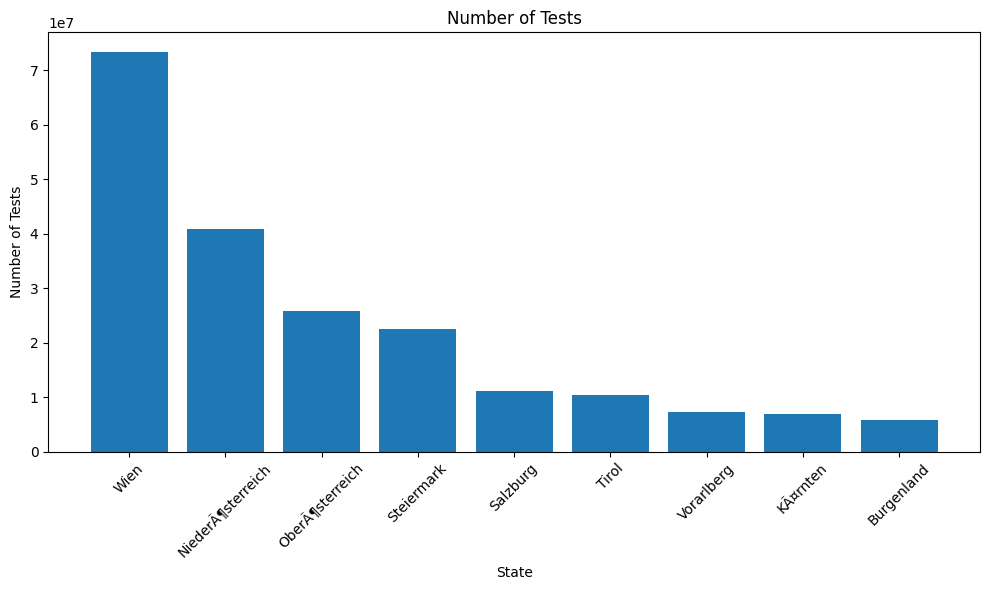

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase
import numpy as np  # Import numpy for array operations

# Run Cypher query
result = graph.run("""
MATCH (t:Tests) where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.Tests
ORDER BY t.Tests DESC
""")

# Convert result to DataFrame
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# Replace None values with np.nan (NaN) or a default value
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.Tests'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Convert 't.Tests' column to numeric (in case it's not already)
df['t.Tests'] = pd.to_numeric(df['t.Tests'])

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.Tests'])
plt.xlabel('State')
plt.ylabel('Number of Tests')
plt.title('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
cypher_query = """
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, sum(t.Tests) as Tests
"""

result = graph.run(cypher_query)

# Convert result to DataFrame
df = pd.DataFrame([dict(r) for r in result], columns=['t.BundeslandName', 'Tests'])

# Replace None values with 'Unknown' for BundeslandName and 0 for Tests
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['Tests'].replace({None: 0}, inplace=True)

# Convert 'Tests' column to numeric (in case it's not already)
df['Tests'] = pd.to_numeric(df['Tests'], errors='coerce')

# Remove rows with non-finite 'Tests' values
df = df[np.isfinite(df['Tests'])]

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Tests'], labels=df['t.BundeslandName'], autopct='%1.1f%%')
plt.title('Distribution of Tests by State')
plt.tight_layout()
plt.show()



ClientError: [Statement.TypeError] SUM(NodeProperty(0,13)) can only handle numerical values, duration, or null.

In [ ]:
print(df.columns)

In [76]:
# Cypher query to retrieve vaccination data
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.BundeslandName AS BundeslandName, i.datum AS Year, sum(i.ersteImpfung+i.zweiteImpfung) AS Vaccinations
ORDER BY Year
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Pivot the DataFrame to have Years as columns
df_pivot = df.pivot(index='BundeslandName', columns='Year', values='Vaccinations')

# Plotting
plt.figure(figsize=(12, 6))
df_pivot.plot(kind='line', marker='o')
plt.title('Change in Vaccinations Over Years by State')
plt.xlabel('State')
plt.ylabel('Number of Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()



CypherTypeError: {code: Neo.ClientError.Statement.TypeError} {message: SUM(Add(SlottedCachedNodeProperty(0,true,19,1),SlottedCachedNodeProperty(0,true,20,0))) can only handle numerical values, duration, or null.}

In [77]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year,i.bezirkId AS opt,sum(i.ersteImpfung) as Vaccinations
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])



# Pivot the DataFrame to have Years as columns
df_pivot = df.pivot(index='opt', columns='Year', values='Vaccinations')

# Plotting
plt.figure(figsize=(12, 6))
df_pivot.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Total Vaccinations Over Years by District')
plt.xlabel('District (bezirk)')
plt.ylabel('Number of Vaccinations')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

CypherTypeError: {code: Neo.ClientError.Statement.TypeError} {message: SUM(SlottedCachedNodeProperty(0,true,19,0)) can only handle numerical values, duration, or null.}

In [78]:
# Define the Cypher query
cypher_query = """
MATCH (n:nodes)
RETURN n.datum AS Year, sum(n.ersteImpfung) as Vaccinations
"""

# Execute the Cypher query
with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Convert the result to pandas DataFrame
df = pd.DataFrame(result)

# Pivot the DataFrame to have Years as columns
df_pivot = df.pivot(columns='Year', values='Vaccinations')

# Plotting
plt.figure(figsize=(10, 6))

# Define bar positions and widths
bar_width = 0.35
r1 = range(len(df_pivot))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, df_pivot.iloc[:, 0], width=bar_width, label='Vaccinations')

# Add labels, title, and legend
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Vaccinations Per Year from Neo4j')
plt.xticks([r + bar_width/2 for r in range(len(df_pivot.columns))], df_pivot.columns)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


KeyError: 'Year'

In [79]:
# Cypher-Abfrage definieren
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, i.bezirkId AS opt,
       CASE WHEN i.datum CONTAINS '2021' THEN sum(i.ersteImpfung) + sum(i.zweiteImpfung)
            WHEN i.datum CONTAINS '2022' THEN sum(i.ersteImpfung) + sum(i.zweiteImpfung) + sum(i.dritteImpfung) + sum(i.vierteImpfung) + sum(i.mehrAlsVier)
            WHEN i.datum CONTAINS '2023' THEN sum(i.ersteImpfung) + sum(i.zweiteImpfung) + sum(i.dritteImpfung) + sum(i.mehrAls3)
       END as Vaccinations
"""

# Ergebnisse aus der Datenbank abrufen
with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Bundesland aus der Bezirks-ID extrahieren
df['bundesland'] = df['opt'].apply(lambda x: int(str(x)[0]))

# DataFrame pivotieren, um Jahre als Spalten zu haben
df_pivot = df.pivot_table(index='bundesland', columns='Year', values='Vaccinations', aggfunc='sum')

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Farben für Jahre

bar_width = 0.2
for i, year in enumerate(df_pivot.columns):
    x = df_pivot.index + i * bar_width  # x-Koordinaten für Balken
    ax.bar(x, df_pivot[year], width=bar_width, label=year, color=colors[i % len(colors)])

ax.set_title('Gesamtimpfungen über Jahre nach Bundesland')
ax.set_xlabel('Bundesland')
ax.set_ylabel('Anzahl der Impfungen')
ax.set_xticks(df_pivot.index + (len(df_pivot.columns) - 1) * bar_width / 2)
ax.set_xticklabels(['Burgenland', 'Kärnten', 'Niederösterreich', 'Oberösterreich',
                    'Salzburg', 'Steiermark', 'Tirol', 'Vorarlberg', 'Wien'])
ax.legend(title='Jahr')
plt.tight_layout()
plt.show()


CypherTypeError: {code: Neo.ClientError.Statement.TypeError} {message: SUM(SlottedCachedNodeProperty(0,true,19,0)) can only handle numerical values, duration, or null.}

In [93]:
import plotly.graph_objs as go
import pandas as pd
import json


austria_geojson_path = 'laender_999_geo.json'


with open(austria_geojson_path) as f:
    austria_geojson = json.load(f)


bundeslander = ['Wien', 'Niederoesterreich', 'Oberoesterreich', 'Steiermark', 'Kaernten', 
                'Salzburg', 'Tirol', 'Vorarlberg', 'Burgenland']


anzahl_befragte = [100, 200, 150, 250, 80, 90, 120, 60, 30]

austriamap = go.Choropleth(
    geojson=austria_geojson,  # Verweise auf die GeoJSON-Datei
    featureidkey="properties.name",  # Pfad zum Attribut im GeoJSON Feature, das den Namen des Bundeslandes enthält
    locations=bundeslander,  # Namen der Bundesländer aus deiner Liste
    z=anzahl_befragte,  # Numerische Werte, die du darstellen möchtest
    colorscale="Blues",
    reversescale=True,
    marker_line_width=0.5,
    colorbar_title="Anzahl der Befragten"
)

layout = go.Layout(
    title_text="Anzahl der Befragten in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    )
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()

In [121]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)


Impf = graph.run("""
MATCH (i:Impf_Patient2021)
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC
""")

df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])

df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['bezirkId'],  
    z=df['TotalImpfungen'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",
        showcountries=True,
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        countrycolor="DarkBlue"
    )
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [113]:
import plotly.graph_objs as go

import json


austria_geojson_path = 'laender_999_geo.json'


with open(austria_geojson_path,  'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient2021)
RETURN i.bezirkId, i.zweiteImpfung
ORDER BY i.Vollimmuiniserte DESC
""")

df = pd.DataFrame([dict(r) for r in Impf], columns=['i.bezirkId', 'i.zweiteImpfung'])

df['bundesland'] = df['i.bezirkId'].apply(lambda x: int(str(x)[0]))

df['i.zweiteImpfung'] = pd.to_numeric(df['i.zweiteImpfung'])



austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweise auf die GeoJSON-Datei
    featureidkey="properties.iso",  # Pfad zum Attribut im GeoJSON Feature, das den Namen des Bundeslandes enthält
    locations=df['bundesland'],  # Hier die Namen der Bundesländer
    z=df['i.zweiteImpfung'],  # Hier die Anzahl der Befragten
    colorscale="Blues",
    reversescale=True,
    marker=dict(line=dict(width=0.5)),
    colorbar=dict(title='Anzahl der Befragten')  # Entferne autotick, da es nicht unterstützt wird
)]

layout = go.Layout(
    title_text="Anzahl der Befragten in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="LightGreen",
        showcountries=True,
        countrywidth=1.0
    )
)


fig = go.Figure(data=austriamap)
fig.show()

Oder mit localhost:7687 kann man neo4j im Browser starten und sich dann mit den Daten anmelden und schauen ob die Verbindung möglich ist.

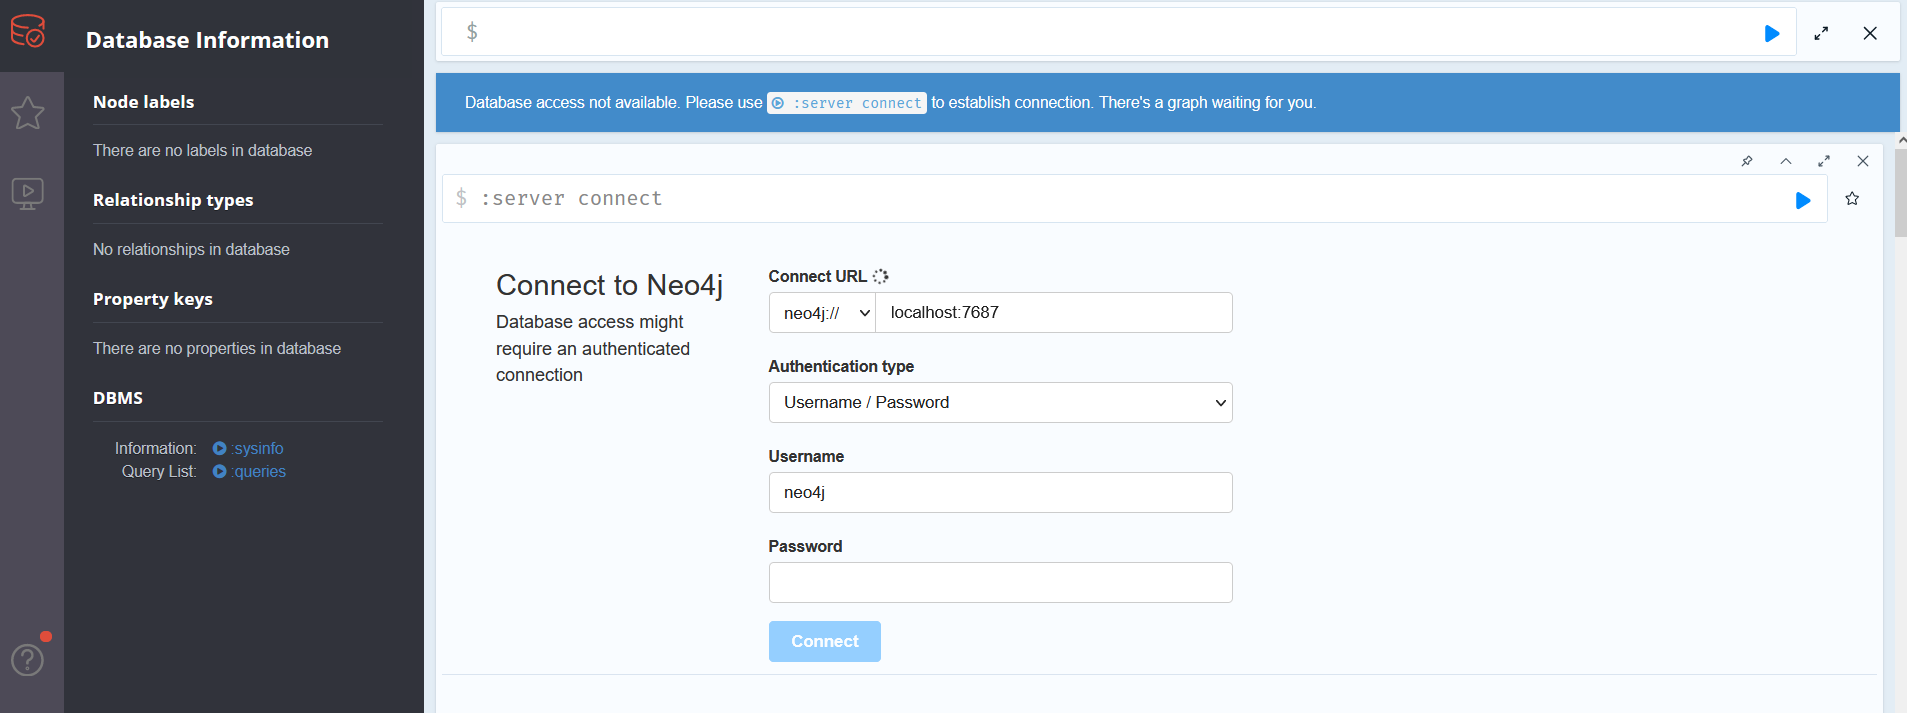

Die Daten können dann mit hilfe von csv, was vorher importiert wurde, einglesen werden und nachdem die Nodes deklariert wurden, kann der Graph erstellt werden mit py2neo.

Um abzufragen wie viele Nodes in Der Tabelle sind, kann diese Query verwendet werden:

In [ ]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS node_count")
    for record in result:
        print(record["node_count"])

In Neo4j wird as Sprache "Cypher" verwendet. In dieser Sprache sind die Nodes mit () dargestellt und die Edges mit [] dargestellt. Hier werden alle Patienten die Covid gehabt haben ausgegeben:

In [ ]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, sum(i.ersteImpfung) AS Vaccinations
"""

result = graph.run(cypher_query)

# Fetch all records
records = result.data()

# Print the result
for record in records:
    print(record)


Dies kann auch mit panda dargestellt werden:

In [ ]:
import pandas as pd

# Assuming you have already executed the cypher_query and stored the result in 'result'
cypher_query = """
MATCH (p:Patient) WHERE p.covid='1'
RETURN p.kalenderWoche, p.wohnort, p.Geschlecht, p.covid, p.influenza, p.rsv, p.sonstige, p.aufnahmen, p.bev_zahl

"""

result = graph.run(cypher_query)

# Extract data from result
data = [dict(record) for record in result]

# Convert the result to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


In dem Neo4j Browser kann man auch alle vorhandenen Eigenschaften einer Column sehen. Dies wird erreicht durch das Anklicken des markierten Feldes:

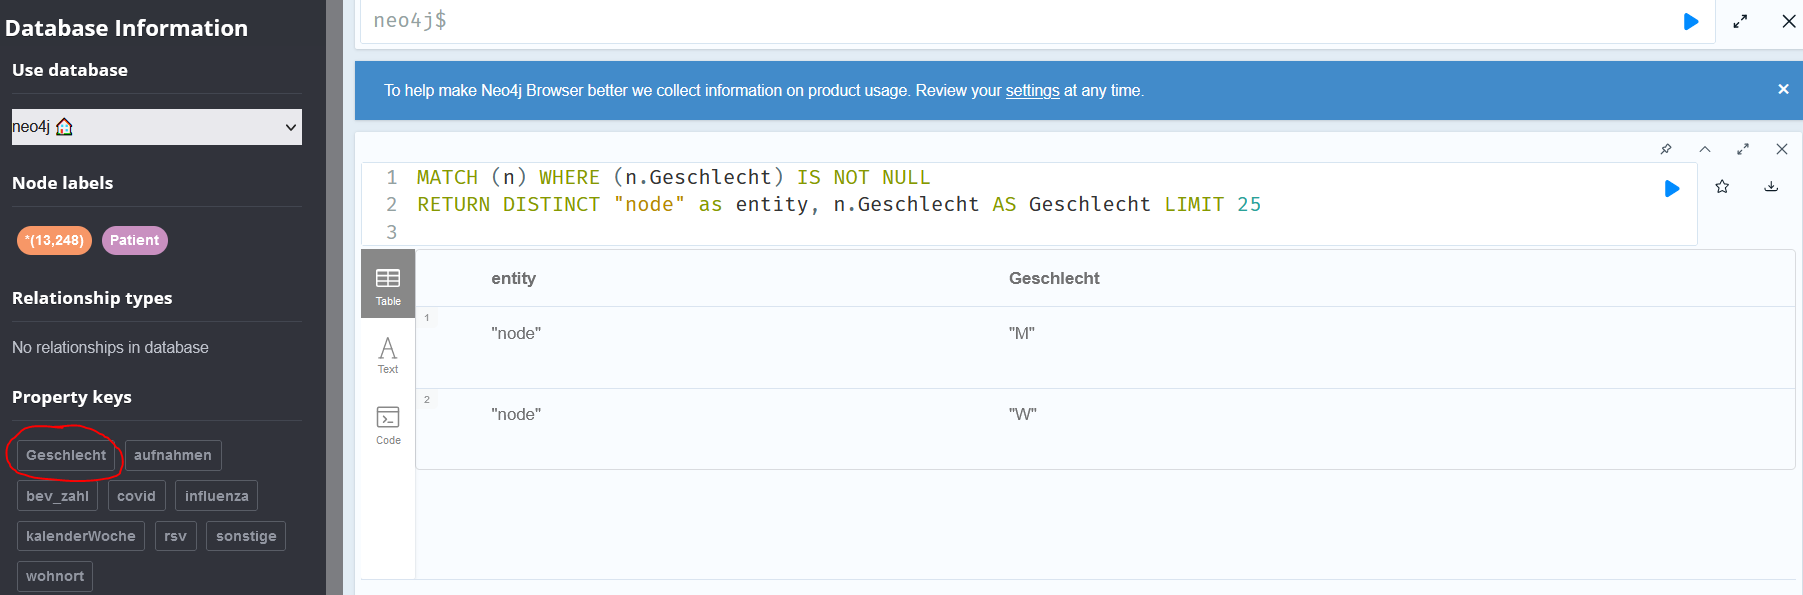

Danach kann der Container wieder geschlossen werden.

In [ ]:
!docker ps

In [ ]:
!docker-compose down

In [ ]:
!docker-compose -p completx_sql down

In [ ]:
!docker volume ls

Um ein Volume zu löschen, kann man wieder folgenden Befehl verwenden:

In [ ]:
!docker volume rm completx_sql_neo4j-data

Anbei ist ein GitHub-Repository zu finden, in dem einige Queries sowie Videos verlinkt sind, die Ihnen helfen können, Cypher und Neo4j besser zu verstehen:
https://github.com/cj2001/bite_sized_data_science/tree/main

Ebenfalls sind in der Dokumentation von Neo4j viele hilfreiche Hinweise zu finden, zum Beispiel zum Import von CSV-Dateien über Python:
https://neo4j.com/docs/getting-started/data-import/csv-import/

Zuletzt noch ein Cheatsheet für Cypher: https://neo4j.com/docs/cypher-cheat-sheet/5/auradb-enterprise/